In [2]:
import pandas as pd

In [3]:
inflows = pd.read_parquet('../data/ucsd-inflows.pqt')

In [4]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [8]:
#Transactions per Consumer
transactions_per_consumer = inflows.groupby('prism_consumer_id').size().reset_index(name='transactions_count')
transactions_per_consumer

,prism_consumer_id,transactions_count
0,0,91
1,2,113
2,4,152
3,7,129
4,9,375
...,...,...
2969,5930,210
2970,5935,83
2971,5939,91
2972,5940,440


In [9]:
# Sum of Inflows per Consumer
inflows_per_consumer = inflows[inflows['amount'] > 0].groupby('prism_consumer_id')['amount'].sum().reset_index(name='total_inflows')
inflows_per_consumer

,prism_consumer_id,total_inflows
0,0,110312.43
1,2,349639.03
2,4,462557.90
3,7,250214.09
4,9,215342.01
...,...,...
2969,5930,127177.11
2970,5935,13640.13
2971,5939,33882.65
2972,5940,67452.46


In [11]:
# Number of Unique Accounts per Consumer
unique_accounts_per_consumer = inflows.groupby('prism_consumer_id')['prism_account_id'].nunique().reset_index(name='unique_accounts')
unique_accounts_per_consumer

,prism_consumer_id,unique_accounts
0,0,2
1,2,1
2,4,1
3,7,2
4,9,7
...,...,...
2969,5930,1
2970,5935,1
2971,5939,1
2972,5940,1


In [12]:
# Merging all consumer-level statistics
consumer_stats = transactions_per_consumer.merge(inflows_per_consumer, on='prism_consumer_id')
consumer_stats = consumer_stats.merge(unique_accounts_per_consumer, on='prism_consumer_id')
consumer_stats

,prism_consumer_id,transactions_count,total_inflows,unique_accounts
0,0,91,110312.43,2
1,2,113,349639.03,1
2,4,152,462557.90,1
3,7,129,250214.09,2
4,9,375,215342.01,7
...,...,...,...,...
2969,5930,210,127177.11,1
2970,5935,83,13640.13,1
2971,5939,91,33882.65,1
2972,5940,440,67452.46,1


In [15]:
# Major Sources of Income
# Group by category and calculate total inflows and transaction counts
major_income_sources = (
    inflows[inflows['amount'] > 0]
    .groupby('category')
    .agg(total_inflows=('amount', 'sum'), transaction_count=('amount', 'size'))
    .reset_index()
    .sort_values(by='total_inflows', ascending=False)
)

major_income_sources

,category,total_inflows,transaction_count
1,EXTERNAL_TRANSFER,81586232.14,156533
0,DEPOSIT,66602343.60,61345
7,PAYCHECK,54018520.29,33138
5,MISCELLANEOUS,52594312.59,55648
10,SELF_TRANSFER,48301522.92,110437
8,PAYCHECK_PLACEHOLDER,35706161.73,26087
6,OTHER_BENEFITS,12175837.46,7708
3,INVESTMENT_INCOME,6887278.35,17325
12,TAX,5619601.78,3405
9,REFUND,5406440.27,23220


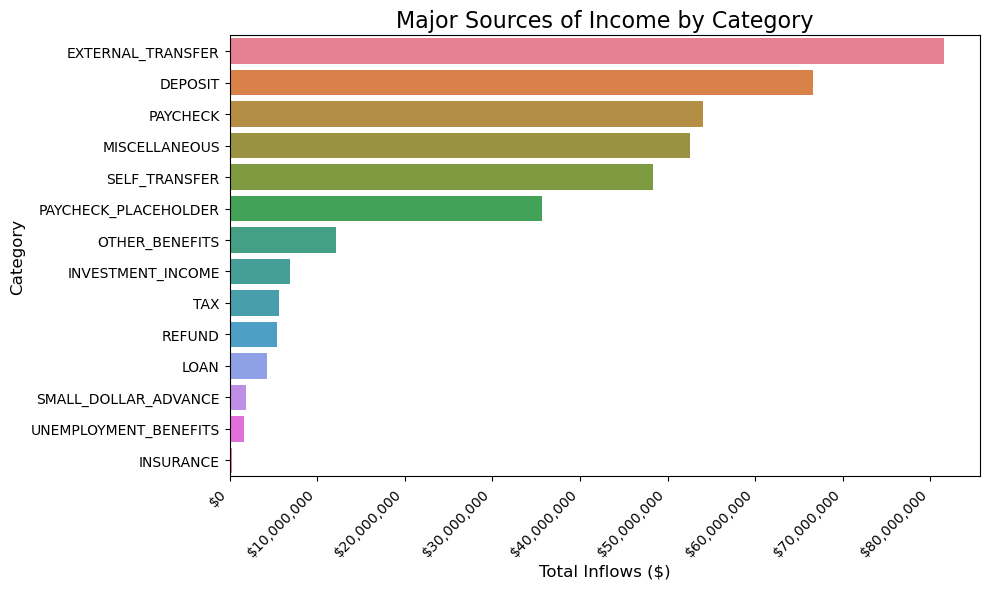

In [23]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.barplot(
    data=major_income_sources,
    x='total_inflows', 
    y='category',       
    hue ='category'      
)

plt.title('Major Sources of Income by Category', fontsize=16)
plt.xlabel('Total Inflows ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
